In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# Get the data for training and for building the submission
features_train = pd.read_csv('../data/raw/x_train_T9QMMVq.csv')
target_train = pd.read_csv('../data/raw/y_train_R0MqWmu.csv')
features_train.columns

Index(['ID', 'Humidity', 'M12', 'M13', 'M14', 'M15', 'M4', 'M5', 'M6', 'M7',
       'R', 'S1', 'S2', 'S3'],
      dtype='object')

In [4]:
features_train.isnull().sum()

ID          0
Humidity    0
M12         0
M13         0
M14         0
M15         0
M4          0
M5          0
M6          0
M7          0
R           0
S1          0
S2          0
S3          0
dtype: int64

In [5]:
target_train

,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1,0.000000,0.000000,0.176471,0.176471,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.176471,0.000000,0.0,0.176471,0.000000
2,2,0.128465,0.000000,0.128465,0.128465,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.128465,0.000000,0.000000,0.0,0.128465,0.000000
3,3,0.000000,0.000000,0.263736,0.263736,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.263736,0.263736
4,4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202928,202928,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
202929,202929,0.142857,0.000000,0.142857,0.142857,0.0,0.0,0.000000,0.000000,0.0,...,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.142857,0.000000
202930,202930,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
202931,202931,0.528846,0.000000,0.528846,0.528846,0.0,0.0,0.000000,0.000000,0.0,...,0.528846,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.528846,0.000000


No missing values!

In [6]:
print(f'The feature df has dimensions {features_train.shape}, the output df dimensions is {target_train.shape}')


The feature df has dimensions (202933, 14), the output df dimensions is (202933, 24)


In [7]:
features_train.describe()

,ID,Humidity,M12,M13,M14,M15,M4,M5,M6,M7,R,S1,S2,S3
count,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000,202933.000000
mean,101466.000000,0.225423,-0.298982,-0.249076,-0.155972,-0.048803,0.891061,0.454768,0.175309,0.080895,1.188765,0.859694,1.014090,1.000640
std,58581.855426,0.335276,1.421943,1.246752,0.848411,0.361638,2.433388,1.578226,0.815405,0.392956,1.828383,0.305172,1.166577,0.023606
min,0.000000,0.000305,-13.021540,-11.844691,-9.117980,-4.165993,-2.831466,-0.790972,-0.224497,-0.147250,0.023324,0.025957,0.151214,0.709661
25%,50733.000000,0.000379,-0.288159,-0.179096,-0.087792,-0.032232,-0.050034,-0.006129,0.002863,0.001548,0.973938,0.773045,0.958714,0.996251
50%,101466.000000,0.090586,-0.000912,0.018658,0.019633,0.012752,0.158831,0.067587,0.035869,0.025857,1.014531,0.931179,0.988017,0.999956
75%,152199.000000,0.328115,0.209746,0.177158,0.120979,0.067154,0.657085,0.259512,0.120237,0.076909,1.121014,0.999371,1.000247,1.008604
max,202932.000000,0.958255,2.545019,2.864641,2.004906,0.842932,28.245698,28.710670,20.508550,10.714200,48.026927,6.626481,55.702963,1.057846


# Correlation matrix

/home/jaime/miniconda3/envs/gas_challenge/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


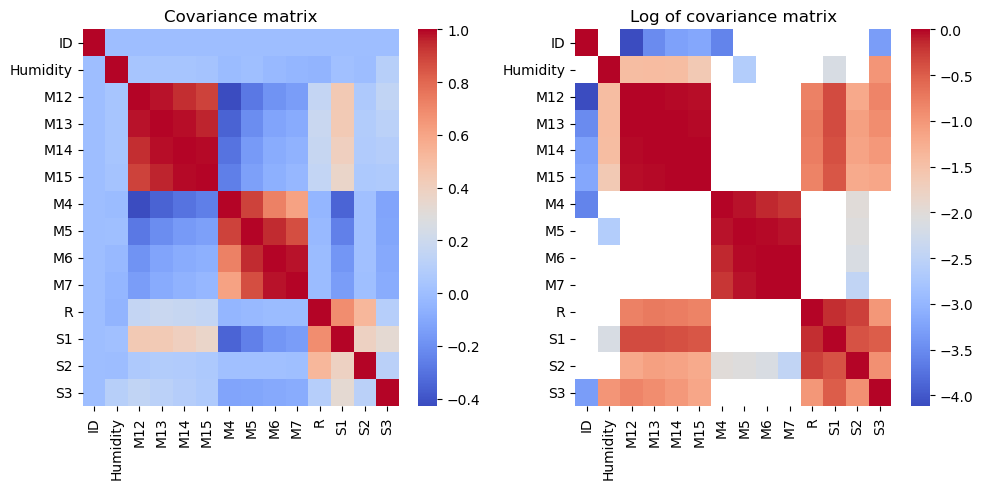

In [8]:
df_corr = features_train.corr()
df_corr_log = np.log10(df_corr)
f, ax = plt.subplots(1,2,figsize=(10,5))
_ = sns.heatmap(df_corr,ax=ax[0],cmap='coolwarm')
_ = sns.heatmap(df_corr_log,ax=ax[1],cmap='coolwarm')
ax[0].set_title('Covariance matrix')
ax[1].set_title('Log of covariance matrix')
f.tight_layout()
f.savefig('covariances_png')


In [9]:
block_1 = ['M12', 'M13', 'M14', 'M15']
block_2 = ['M4', 'M5', 'M6', 'M7']
block_3 = ['R', 'S1', 'S2', 'S3'] # Note that this last block is considerably looser than the rest, and correlated with the 1st

#### Colinear blocks!
Highly correlated entries can lead to overfitting, by encoding in different variables essentially the same information. There are 3 blocks of colinearity. 
We could train a whole model on the whole set of features, or train three models on the three colinearity blocks.

#### Effect on my models:
As I plan to use neural network or boosted trees, multicolinearity is not such a big problem. Remember, as long as you don't invert a matrix with colinear entries (as you do with linear methods), you don't get numerical instabilities. Still, could help to reduce the dimensionality, by summarizing at least two of the blocks in one or two variables each

# ICA 

([<matplotlib.axis.YTick at 0x716bf9bc53a0>,
 [Text(0, 0, 'ID'),
  Text(0, 1, 'Humidity'),
  Text(0, 2, 'M12'),
  Text(0, 3, 'M13'),
  Text(0, 4, 'M14'),
  Text(0, 5, 'M15'),
  Text(0, 6, 'M4'),
  Text(0, 7, 'M5'),
  Text(0, 8, 'M6'),
  Text(0, 9, 'M7'),
  Text(0, 10, 'R'),
  Text(0, 11, 'S1'),
  Text(0, 12, 'S2'),
  Text(0, 13, 'S3')])

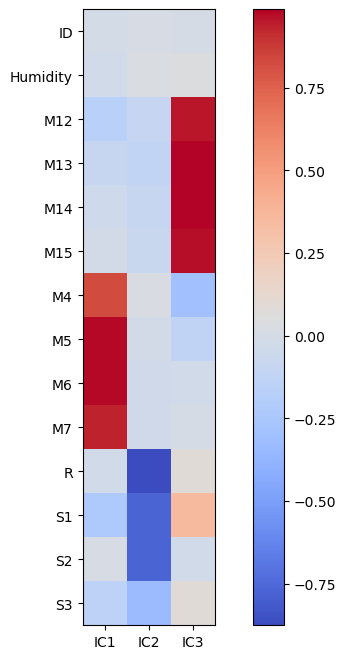

In [10]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_ica = scaler.fit_transform(features_train)
features_scaled_df = pd.DataFrame(df_ica,columns=features_train.columns)
n_blocks=3
ica = FastICA(n_components=n_blocks, random_state=4471)
ica_results = ica.fit_transform(df_ica)
ica_matrix = ica.mixing_

plt.figure(figsize=(10, 8))
plt.imshow(ica_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(n_blocks), [f'IC{i+1}' for i in range(n_blocks)])
plt.yticks(range(len(features_train.columns)), features_train.columns)


#### Confirmed the presence of 3 independent signals + humidity, that are contained in the three blocks of the cov matrix. This can inform the model construction

# Analysis of the labels

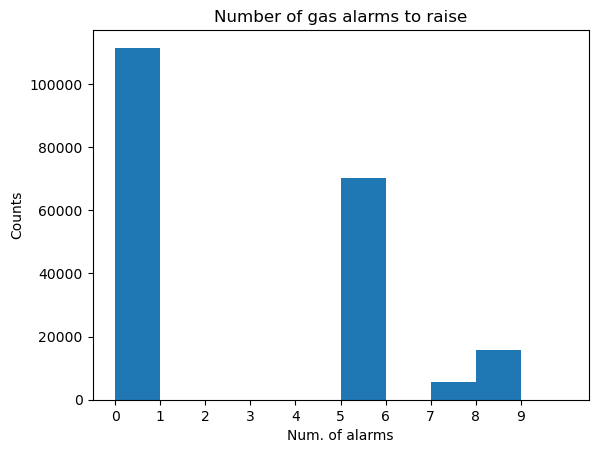

In [11]:
y_noid = target_train.drop(columns='ID')

threshold = 0.5 #The level at which alert is raised
alarms = (y_noid > threshold).sum(axis=1)
f,ax = plt.subplots()
ax.set_xticks(range(0,10))
ax.hist(alarms,range=(0,10),bins=10)
ax.set_title('Number of gas alarms to raise')
ax.set_xlabel('Num. of alarms')
ax.set_ylabel('Counts')
f.savefig('alarms_hist.png',bbox_inches='tight')


/home/jaime/miniconda3/envs/gas_challenge/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


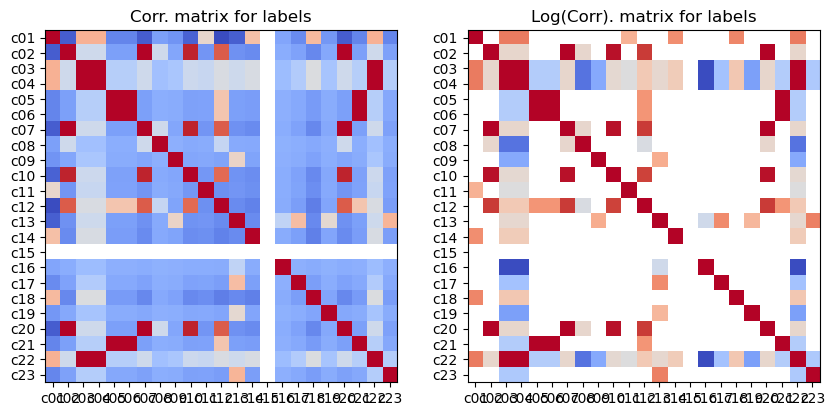

In [12]:
target_corr = y_noid.corr()
target_corr_log = np.log10(target_corr)
target_names = list(target_corr.columns)


f, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].imshow(target_corr, cmap='coolwarm')
ax[0].set_xticks(range(len(target_names)))
ax[0].set_xticklabels(target_names)
ax[0].set_yticks(range(len(target_names)))
ax[0].set_yticklabels(target_names)
ax[1].imshow(target_corr_log,cmap='coolwarm')
ax[1].set_xticks(range(len(target_names)))
ax[1].set_xticklabels(target_names)
ax[1].set_yticks(range(len(target_names)))
ax[1].set_yticklabels(target_names)

ax[0].set_title('Corr. matrix for labels')
ax[1].set_title('Log(Corr). matrix for labels')


f.savefig('label_correlations.png',bbox_inches='tight')

In [13]:
y_noid['c15']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
202928    0.0
202929    0.0
202930    0.0
202931    0.0
202932    0.0
Name: c15, Length: 202933, dtype: float64

# Linearity of the 3 independent components

The ICA coefficients are linear combinantions of the original features. It is convenient to check if a linear transformation is enough to reconstruct the dataset, or if the transformation is nonlinear and a neural network is required 

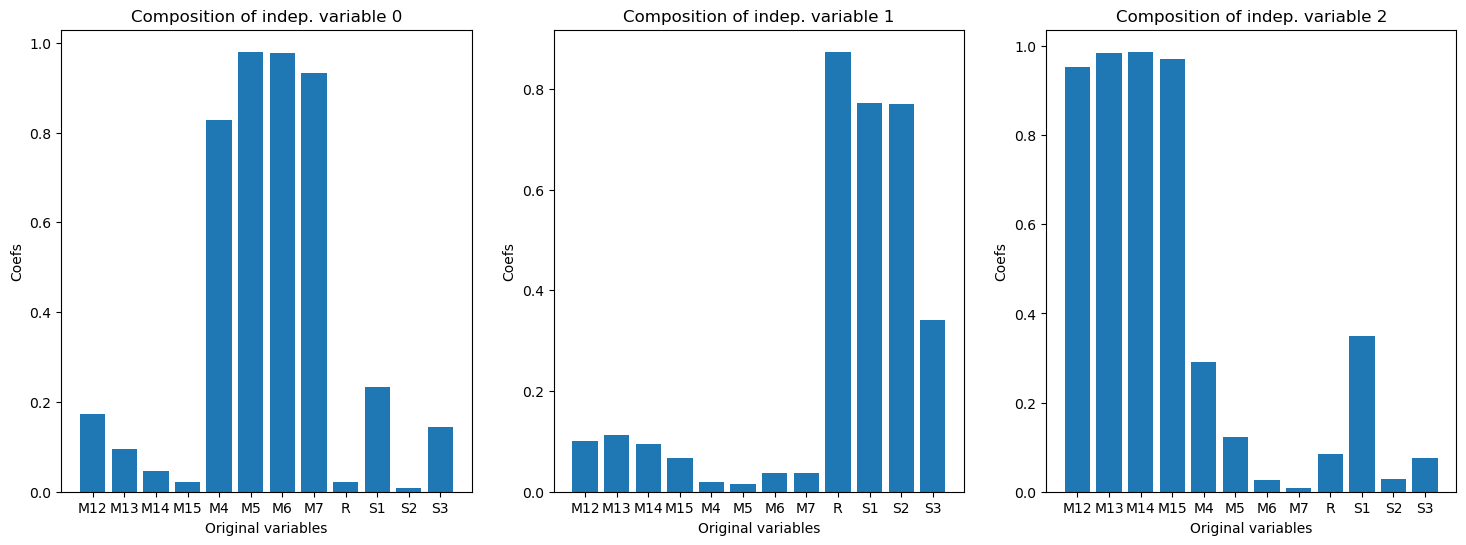

In [14]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

correlated_features = features_scaled_df.drop(columns=['ID', 'Humidity']) #eliminate not useful cols for the analysis
feature_names = list(correlated_features.columns)
# Do ICA to obtain coefficients of linear mix,
ica = FastICA(n_components=n_blocks, random_state=4471)
ica.fit_transform(correlated_features)

mix_matrix = ica.mixing_
num_components, num_indep = np.shape(mix_matrix)
f,ax = plt.subplots(1,3,figsize=(18,6))
for i in range(num_indep):
    ax[i].bar(range(num_components),np.abs(mix_matrix[:,i]))
    ax[i].set_title(f'Composition of indep. variable {i}')
    ax[i].set_xlabel('Original variables')
    ax[i].set_xticks(range(num_components))
    ax[i].set_xticklabels(feature_names)
    ax[i].set_ylabel('Coefs')


f.savefig('ica_contrubution_hist.png',bbox_inches='tight')

/home/jaime/miniconda3/envs/gas_challenge/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


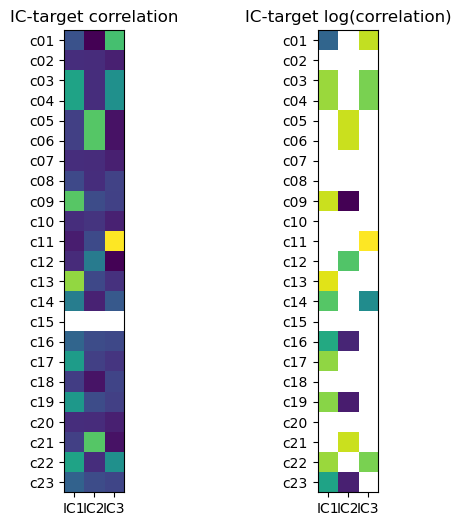

In [15]:
# Now, transform 
ica_variables = ica.transform(correlated_features)
ica_df = pd.DataFrame(ica_variables, columns=['IC1', 'IC2', 'IC3'])
extended_target = pd.concat((ica_df,target_train), axis=1)
ica_label_corr = extended_target.corr()

ica_label_corr = ica_label_corr.loc[['IC1','IC2', 'IC3'], target_names]
ica_label_corr_log = np.log10(ica_label_corr)
f,ax = plt.subplots(1,2,figsize=(6,6))
ax[0].imshow(ica_label_corr.T)
ax[1].imshow(ica_label_corr_log.T)

ax[0].set_xticks(range(num_indep))
ax[0].set_xticklabels(['IC1', 'IC2', 'IC3'])
ax[0].set_yticks(range(len(target_names)))
ax[0].set_yticklabels(target_names)

ax[1].set_xticks(range(num_indep))
ax[1].set_xticklabels(['IC1', 'IC2', 'IC3'])
ax[1].set_yticks(range(len(target_names)))
ax[1].set_yticklabels(target_names)

ax[0].set_title('IC-target correlation')
ax[1].set_title('IC-target log(correlation)')
f.savefig('ic_target_corrs.png',bbox_inches='tight')

# PCA to analyze relevant components for the correlated blocks

In [34]:
df_corr_1stblock = np.array(df_corr[block_1].loc[block_1])
df_corr_2ndblock = np.array(df_corr[block_2].loc[block_2])
df_corr_3ndblock = np.array(df_corr[block_3].loc[block_3])

In [35]:
df_corr_1stblock

array([[1.        , 0.97984532, 0.941479  , 0.89530415],
       [0.97984532, 1.        , 0.98779851, 0.95811689],
       [0.941479  , 0.98779851, 1.        , 0.98897591],
       [0.89530415, 0.95811689, 0.98897591, 1.        ]])

In [41]:
from numpy.linalg import eig

eval1, evec1 = eig(df_corr_1stblock)
eval2, evec2 = eig(df_corr_2ndblock)
eval3, evec3 = eig(df_corr_3ndblock)

In [48]:
print(eval1)
print(eval2)
print(eval3)

[3.87633690e+00 1.16997169e-01 6.00632081e-03 6.59611397e-04]
[3.52312839e+00 4.50845353e-01 2.48060692e-02 1.22019257e-03]
[2.16298294 0.25913651 0.9738632  0.60401734]
